In [1]:
# Parameters
file_path = "MCD.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,282.019989,283.149994,280.649994,281.869995,275.328552,2308800
1,2023-08-24,281.739990,284.750000,281.739990,282.350006,275.797455,2006400
2,2023-08-25,284.760010,286.140015,283.510010,284.579987,277.975616,3725200
3,2023-08-28,284.579987,286.200012,283.510010,283.679993,277.096558,2317600
4,2023-08-29,283.950012,284.570007,280.429993,283.589996,277.008606,2348500
...,...,...,...,...,...,...,...
247,2024-08-16,274.750000,279.500000,274.700012,278.489990,278.489990,3286000
248,2024-08-19,282.329987,288.320007,281.720001,287.549988,287.549988,5268800
249,2024-08-20,286.500000,290.269989,285.209991,285.630005,285.630005,3697600
250,2024-08-21,287.149994,289.970001,286.269989,289.709991,289.709991,2686300


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,281.869995
1,2023-08-24,282.350006
2,2023-08-25,284.579987
3,2023-08-28,283.679993
4,2023-08-29,283.589996
...,...,...
247,2024-08-16,278.489990
248,2024-08-19,287.549988
249,2024-08-20,285.630005
250,2024-08-21,289.709991


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88229/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,281.869995
2023-08-24,282.350006
2023-08-25,284.579987
2023-08-28,283.679993
2023-08-29,283.589996
...,...
2024-08-16,278.489990
2024-08-19,287.549988
2024-08-20,285.630005


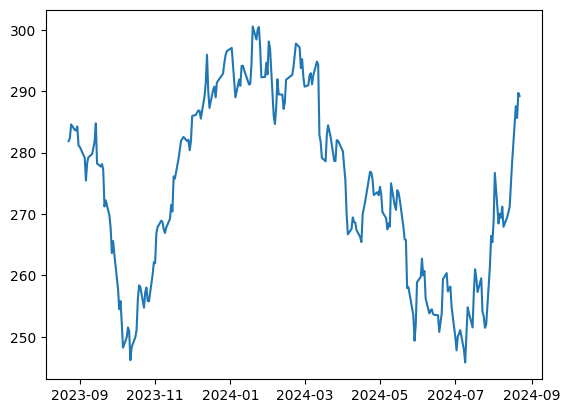

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,281.869995,282.350006,284.579987,283.679993,283.589996,284.239990,281.149994,280.940002,279.160004,...,272.220001,269.779999,267.720001,263.640015,265.589996,263.440002,257.750000,254.490005,255.809998,252.229996
1,2023-10-06,282.350006,284.579987,283.679993,283.589996,284.239990,281.149994,280.940002,279.160004,275.440002,...,269.779999,267.720001,263.640015,265.589996,263.440002,257.750000,254.490005,255.809998,252.229996,248.220001
2,2023-10-09,284.579987,283.679993,283.589996,284.239990,281.149994,280.940002,279.160004,275.440002,278.329987,...,267.720001,263.640015,265.589996,263.440002,257.750000,254.490005,255.809998,252.229996,248.220001,249.919998
3,2023-10-10,283.679993,283.589996,284.239990,281.149994,280.940002,279.160004,275.440002,278.329987,279.220001,...,263.640015,265.589996,263.440002,257.750000,254.490005,255.809998,252.229996,248.220001,249.919998,251.520004
4,2023-10-11,283.589996,284.239990,281.149994,280.940002,279.160004,275.440002,278.329987,279.220001,279.760010,...,265.589996,263.440002,257.750000,254.490005,255.809998,252.229996,248.220001,249.919998,251.520004,250.919998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,251.089996,247.850006,245.820007,250.490005,254.800003,253.899994,251.529999,257.269989,261.000000,...,268.450012,270.059998,269.369995,271.190002,267.910004,269.459991,270.309998,271.149994,274.869995,278.489990
218,2024-08-19,247.850006,245.820007,250.490005,254.800003,253.899994,251.529999,257.269989,261.000000,259.519989,...,270.059998,269.369995,271.190002,267.910004,269.459991,270.309998,271.149994,274.869995,278.489990,287.549988
219,2024-08-20,245.820007,250.490005,254.800003,253.899994,251.529999,257.269989,261.000000,259.519989,257.279999,...,269.369995,271.190002,267.910004,269.459991,270.309998,271.149994,274.869995,278.489990,287.549988,285.630005
220,2024-08-21,250.490005,254.800003,253.899994,251.529999,257.269989,261.000000,259.519989,257.279999,259.540009,...,271.190002,267.910004,269.459991,270.309998,271.149994,274.869995,278.489990,287.549988,285.630005,289.709991


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

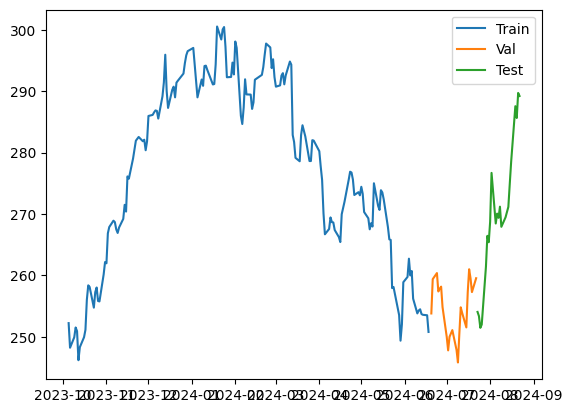

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 819ms/step - loss: 78052.5156 - mean_absolute_error: 278.9194

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76680.2656 - mean_absolute_error: 276.4764 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 76647.7812 - mean_absolute_error: 276.4283 - val_loss: 63733.4961 - val_mean_absolute_error: 252.4151


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 73936.7656 - mean_absolute_error: 271.4274

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 75571.5938 - mean_absolute_error: 274.4737

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75408.9766 - mean_absolute_error: 274.1823 - val_loss: 61396.5000 - val_mean_absolute_error: 247.7426


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 73625.4219 - mean_absolute_error: 270.9346

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72534.4688 - mean_absolute_error: 268.9160

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 72218.1484 - mean_absolute_error: 268.3196 - val_loss: 55994.7617 - val_mean_absolute_error: 236.5894


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 68662.2031 - mean_absolute_error: 261.7304

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66008.4297 - mean_absolute_error: 256.4936

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 65195.9922 - mean_absolute_error: 254.8622 - val_loss: 43653.7656 - val_mean_absolute_error: 208.8856


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 53131.8516 - mean_absolute_error: 230.0213

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 49783.5508 - mean_absolute_error: 222.4137

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 48398.8242 - mean_absolute_error: 219.1248 - val_loss: 19621.7871 - val_mean_absolute_error: 140.0010


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 26960.4961 - mean_absolute_error: 163.4208

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 24007.2070 - mean_absolute_error: 153.6194

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 21426.3984 - mean_absolute_error: 143.6923

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 20358.3379 - mean_absolute_error: 139.1344

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 19595.4375 - mean_absolute_error: 135.8788 - val_loss: 75.0025 - val_mean_absolute_error: 7.1930


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 620.8461 - mean_absolute_error: 22.0489

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1123.1830 - mean_absolute_error: 27.7783

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1989.3759 - mean_absolute_error: 36.6743 - val_loss: 10991.7539 - val_mean_absolute_error: 104.7340


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6300.7202 - mean_absolute_error: 77.7414

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5832.3354 - mean_absolute_error: 74.4668

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4933.8091 - mean_absolute_error: 66.8054

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4742.1699 - mean_absolute_error: 65.0313 - val_loss: 790.5148 - val_mean_absolute_error: 27.7446


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 399.2089 - mean_absolute_error: 16.5932

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 466.1376 - mean_absolute_error: 17.8870

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 545.7942 - mean_absolute_error: 19.3671 - val_loss: 233.4261 - val_mean_absolute_error: 14.5988


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1543.8958 - mean_absolute_error: 36.6712

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1542.7537 - mean_absolute_error: 36.5335

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1505.3109 - mean_absolute_error: 35.9040 - val_loss: 23.9028 - val_mean_absolute_error: 4.0451


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 806.7826 - mean_absolute_error: 25.5446

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 561.2660 - mean_absolute_error: 20.5180

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 519.1126 - mean_absolute_error: 19.6103 - val_loss: 1273.9960 - val_mean_absolute_error: 35.4094


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 433.0345 - mean_absolute_error: 16.1769

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 461.6700 - mean_absolute_error: 16.7299

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 468.3728 - mean_absolute_error: 16.8449 - val_loss: 1313.0878 - val_mean_absolute_error: 35.9574


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 343.4140 - mean_absolute_error: 14.0617

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 319.5090 - mean_absolute_error: 13.9583

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 309.2028 - mean_absolute_error: 13.8277 - val_loss: 363.2766 - val_mean_absolute_error: 18.5239


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 279.9940 - mean_absolute_error: 15.2151

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 271.9502 - mean_absolute_error: 14.4916

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 275.7058 - mean_absolute_error: 14.4478 - val_loss: 208.8961 - val_mean_absolute_error: 13.7390


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 326.8492 - mean_absolute_error: 15.6737

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 295.3979 - mean_absolute_error: 14.8613

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 286.7925 - mean_absolute_error: 14.6325 - val_loss: 551.3218 - val_mean_absolute_error: 23.0475


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 258.8098 - mean_absolute_error: 14.2277

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 241.0540 - mean_absolute_error: 13.3928

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 239.7869 - mean_absolute_error: 13.2733 - val_loss: 747.5276 - val_mean_absolute_error: 26.9703


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 283.2563 - mean_absolute_error: 13.1771

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 237.1986 - mean_absolute_error: 12.6986

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 235.8050 - mean_absolute_error: 12.7987 - val_loss: 513.5971 - val_mean_absolute_error: 22.2141


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 293.8573 - mean_absolute_error: 15.2689

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 246.3312 - mean_absolute_error: 13.6954

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 240.4967 - mean_absolute_error: 13.5212 - val_loss: 430.4090 - val_mean_absolute_error: 20.2560


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 264.3938 - mean_absolute_error: 14.9229

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 224.5797 - mean_absolute_error: 13.1785

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 223.4252 - mean_absolute_error: 13.0790 - val_loss: 570.6225 - val_mean_absolute_error: 23.4628


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 229.9139 - mean_absolute_error: 13.3115

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 226.0377 - mean_absolute_error: 12.9198

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 226.4901 - mean_absolute_error: 12.9753 - val_loss: 567.6386 - val_mean_absolute_error: 23.4001


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 187.5656 - mean_absolute_error: 11.4321

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 198.8050 - mean_absolute_error: 12.0595

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 207.9068 - mean_absolute_error: 12.3687 - val_loss: 496.0220 - val_mean_absolute_error: 21.8180


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 196.9636 - mean_absolute_error: 11.8036

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 202.2001 - mean_absolute_error: 12.1911

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 206.7344 - mean_absolute_error: 12.3620 - val_loss: 402.6644 - val_mean_absolute_error: 19.5670


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 153.8440 - mean_absolute_error: 10.4966

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 189.0918 - mean_absolute_error: 11.6847

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 196.8098 - mean_absolute_error: 11.9675 - val_loss: 492.7707 - val_mean_absolute_error: 21.7476


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 211.3622 - mean_absolute_error: 12.5867

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 229.1877 - mean_absolute_error: 13.2805

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 223.3809 - mean_absolute_error: 13.0591

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 220.1497 - mean_absolute_error: 12.9337

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 219.7892 - mean_absolute_error: 12.9202 - val_loss: 525.9786 - val_mean_absolute_error: 22.4972


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 217.6638 - mean_absolute_error: 12.8736

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 226.4507 - mean_absolute_error: 13.2072

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 223.0449 - mean_absolute_error: 13.0514 - val_loss: 535.2468 - val_mean_absolute_error: 22.7056


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 227.2632 - mean_absolute_error: 12.9222

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 228.8822 - mean_absolute_error: 13.1079

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 222.8523 - mean_absolute_error: 12.9305 - val_loss: 502.2776 - val_mean_absolute_error: 21.9697


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 235.6221 - mean_absolute_error: 13.3216

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 224.1086 - mean_absolute_error: 13.0315

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 221.8368 - mean_absolute_error: 12.9574 - val_loss: 470.1538 - val_mean_absolute_error: 21.2354


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 201.3518 - mean_absolute_error: 11.7719

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 199.1353 - mean_absolute_error: 11.9458

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 204.6408 - mean_absolute_error: 12.2627 - val_loss: 558.0864 - val_mean_absolute_error: 23.2179


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 192.5542 - mean_absolute_error: 12.0095

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 205.3599 - mean_absolute_error: 12.2732

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 205.6213 - mean_absolute_error: 12.3342 - val_loss: 529.1310 - val_mean_absolute_error: 22.5922


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 206.7623 - mean_absolute_error: 12.0955

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 206.5965 - mean_absolute_error: 12.3521

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 206.4873 - mean_absolute_error: 12.3608 - val_loss: 513.8367 - val_mean_absolute_error: 22.2536


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 197.1660 - mean_absolute_error: 12.9863

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 185.0233 - mean_absolute_error: 12.0902

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 185.8602 - mean_absolute_error: 12.0475 - val_loss: 357.3914 - val_mean_absolute_error: 18.3868


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 147.2736 - mean_absolute_error: 10.5366

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 175.2151 - mean_absolute_error: 11.4840

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 176.6213 - mean_absolute_error: 11.5056 - val_loss: 356.8426 - val_mean_absolute_error: 18.3674


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 154.4982 - mean_absolute_error: 10.7612

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 164.9855 - mean_absolute_error: 11.1891

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 162.7138 - mean_absolute_error: 11.0731 - val_loss: 403.3527 - val_mean_absolute_error: 19.5995


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 180.2657 - mean_absolute_error: 12.0032

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 170.8690 - mean_absolute_error: 11.3627

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 166.8044 - mean_absolute_error: 11.1623 - val_loss: 353.6530 - val_mean_absolute_error: 18.2935


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 109.7452 - mean_absolute_error: 8.6621

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 127.1556 - mean_absolute_error: 9.4906

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 136.8322 - mean_absolute_error: 9.9398

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 141.0907 - mean_absolute_error: 10.1448

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 142.1626 - mean_absolute_error: 10.1947 - val_loss: 380.4872 - val_mean_absolute_error: 19.0143


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 191.9870 - mean_absolute_error: 11.8993

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 164.2035 - mean_absolute_error: 10.9092

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 157.0954 - mean_absolute_error: 10.6457 - val_loss: 363.5112 - val_mean_absolute_error: 18.5664


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 169.8275 - mean_absolute_error: 11.2577

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 151.1466 - mean_absolute_error: 10.5023

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 151.3301 - mean_absolute_error: 10.4717 - val_loss: 436.8640 - val_mean_absolute_error: 20.4650


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 141.1449 - mean_absolute_error: 10.3354

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 164.7161 - mean_absolute_error: 10.9922

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 165.4669 - mean_absolute_error: 11.0044 - val_loss: 312.3380 - val_mean_absolute_error: 17.1395


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 115.1728 - mean_absolute_error: 9.0972

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 125.9517 - mean_absolute_error: 9.4518

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 128.0080 - mean_absolute_error: 9.5321 - val_loss: 186.1986 - val_mean_absolute_error: 12.9543


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 133.5849 - mean_absolute_error: 9.7981

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 113.6196 - mean_absolute_error: 8.9487

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 114.0619 - mean_absolute_error: 8.9760 - val_loss: 227.9347 - val_mean_absolute_error: 14.4845


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 160.2825 - mean_absolute_error: 11.2557

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 136.3461 - mean_absolute_error: 10.1396

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 135.9190 - mean_absolute_error: 10.0936 - val_loss: 63.1731 - val_mean_absolute_error: 6.6816


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 263.9185 - mean_absolute_error: 14.4112

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 190.5002 - mean_absolute_error: 11.8293

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 179.9518 - mean_absolute_error: 11.3973 - val_loss: 192.4132 - val_mean_absolute_error: 13.2126


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 107.7428 - mean_absolute_error: 8.7357

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 121.3544 - mean_absolute_error: 9.4861

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 119.9831 - mean_absolute_error: 9.4134 - val_loss: 170.7352 - val_mean_absolute_error: 12.4357


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 67.6472 - mean_absolute_error: 6.8936

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.3296 - mean_absolute_error: 7.4115

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 77.0529 - mean_absolute_error: 7.5558 - val_loss: 111.1978 - val_mean_absolute_error: 9.7649


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 56.7320 - mean_absolute_error: 6.0235

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.0306 - mean_absolute_error: 6.6689

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 66.2417 - mean_absolute_error: 6.7656 - val_loss: 29.6488 - val_mean_absolute_error: 4.2747


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 53.3759 - mean_absolute_error: 6.1858

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.0733 - mean_absolute_error: 7.6384

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 84.1604 - mean_absolute_error: 7.5208 - val_loss: 68.3096 - val_mean_absolute_error: 7.3890


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 37.5573 - mean_absolute_error: 5.2010

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 42.9694 - mean_absolute_error: 5.6159

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.3781 - mean_absolute_error: 5.5723 - val_loss: 33.3515 - val_mean_absolute_error: 4.6789


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33.7690 - mean_absolute_error: 4.9254

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.9170 - mean_absolute_error: 4.5350

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.1452 - mean_absolute_error: 4.5455 - val_loss: 17.0849 - val_mean_absolute_error: 3.3202


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.5451 - mean_absolute_error: 4.0350

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.9967 - mean_absolute_error: 4.0415

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.6690 - mean_absolute_error: 3.9930 - val_loss: 12.4715 - val_mean_absolute_error: 2.8711


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 18.4563 - mean_absolute_error: 3.4299

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.9741 - mean_absolute_error: 3.5958

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.8707 - mean_absolute_error: 3.6807 - val_loss: 17.5751 - val_mean_absolute_error: 3.4026


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.8742 - mean_absolute_error: 3.7956

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.0178 - mean_absolute_error: 3.8978

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.8940 - mean_absolute_error: 3.8808 - val_loss: 15.3997 - val_mean_absolute_error: 3.3182


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.8533 - mean_absolute_error: 3.5098

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.9949 - mean_absolute_error: 3.4058

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.8293 - mean_absolute_error: 3.4979 - val_loss: 12.9616 - val_mean_absolute_error: 2.9152


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.8826 - mean_absolute_error: 2.7070

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.0995 - mean_absolute_error: 3.0451

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.1291 - mean_absolute_error: 3.1566 - val_loss: 19.8260 - val_mean_absolute_error: 3.6696


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.5574 - mean_absolute_error: 3.5658

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.7969 - mean_absolute_error: 3.3862

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.2281 - mean_absolute_error: 3.4310 - val_loss: 25.0734 - val_mean_absolute_error: 4.1316


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.8733 - mean_absolute_error: 3.8590

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.8498 - mean_absolute_error: 3.4585

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.2209 - mean_absolute_error: 3.3380 - val_loss: 14.1992 - val_mean_absolute_error: 3.0653


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.5535 - mean_absolute_error: 3.2682

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.2399 - mean_absolute_error: 3.3743

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.1787 - mean_absolute_error: 3.3710 - val_loss: 12.0492 - val_mean_absolute_error: 2.8587


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 16.3401 - mean_absolute_error: 3.2760

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.0905 - mean_absolute_error: 2.8195

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.4015 - mean_absolute_error: 2.8684 - val_loss: 14.6301 - val_mean_absolute_error: 3.2197


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.0399 - mean_absolute_error: 3.7844

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.3486 - mean_absolute_error: 3.5372

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.0953 - mean_absolute_error: 3.5303 - val_loss: 18.6524 - val_mean_absolute_error: 3.6024


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 20.9203 - mean_absolute_error: 3.3351

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.3472 - mean_absolute_error: 3.6137

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.0974 - mean_absolute_error: 3.6376 - val_loss: 28.9013 - val_mean_absolute_error: 4.4968


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 25.9085 - mean_absolute_error: 4.1431

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.3523 - mean_absolute_error: 3.8039

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.9847 - mean_absolute_error: 3.7798 - val_loss: 18.4351 - val_mean_absolute_error: 3.5911


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.4632 - mean_absolute_error: 3.2863

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.8620 - mean_absolute_error: 3.5379

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 20.3854 - mean_absolute_error: 3.6612 - val_loss: 20.3154 - val_mean_absolute_error: 3.7499


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17.6386 - mean_absolute_error: 3.3804

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.2838 - mean_absolute_error: 4.2900

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.5002 - mean_absolute_error: 4.3607 - val_loss: 17.4847 - val_mean_absolute_error: 3.4798


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.1730 - mean_absolute_error: 3.2264

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.3596 - mean_absolute_error: 3.5413

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.8327 - mean_absolute_error: 3.5712 - val_loss: 12.4252 - val_mean_absolute_error: 2.8517


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.2705 - mean_absolute_error: 2.6998

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.5664 - mean_absolute_error: 3.6364

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.5204 - mean_absolute_error: 3.6348 - val_loss: 10.8423 - val_mean_absolute_error: 2.7140


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.9663 - mean_absolute_error: 2.7387

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.0725 - mean_absolute_error: 2.9423

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.9373 - mean_absolute_error: 2.9273 - val_loss: 10.8370 - val_mean_absolute_error: 2.6450


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.7291 - mean_absolute_error: 2.8741

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.2009 - mean_absolute_error: 2.6305

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.2514 - mean_absolute_error: 2.6268 - val_loss: 15.6318 - val_mean_absolute_error: 3.2891


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.1936 - mean_absolute_error: 3.4147

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.3768 - mean_absolute_error: 3.0314

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.0547 - mean_absolute_error: 2.9832 - val_loss: 15.1911 - val_mean_absolute_error: 3.2634


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.9829 - mean_absolute_error: 3.1455

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.3412 - mean_absolute_error: 2.9009

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.3965 - mean_absolute_error: 2.8909 - val_loss: 15.4884 - val_mean_absolute_error: 3.2855


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17.6307 - mean_absolute_error: 3.5840

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.1842 - mean_absolute_error: 3.1754

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.5507 - mean_absolute_error: 3.0771 - val_loss: 12.1771 - val_mean_absolute_error: 2.9334


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.5117 - mean_absolute_error: 1.8048

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8108 - mean_absolute_error: 2.4154

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.3115 - mean_absolute_error: 2.4834 - val_loss: 11.9246 - val_mean_absolute_error: 2.9132


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.0299 - mean_absolute_error: 2.5410

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.2995 - mean_absolute_error: 2.6197

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.0907 - mean_absolute_error: 2.6012 - val_loss: 10.9242 - val_mean_absolute_error: 2.6984


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.0894 - mean_absolute_error: 2.1573

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.5099 - mean_absolute_error: 2.2950

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.1154 - mean_absolute_error: 2.3424 - val_loss: 11.4953 - val_mean_absolute_error: 2.7978


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.9597 - mean_absolute_error: 1.9335

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.0803 - mean_absolute_error: 2.3867

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.2298 - mean_absolute_error: 2.4237 - val_loss: 10.7269 - val_mean_absolute_error: 2.6680


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.0714 - mean_absolute_error: 2.6209

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.4761 - mean_absolute_error: 2.6130

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.1500 - mean_absolute_error: 2.5885 - val_loss: 10.9745 - val_mean_absolute_error: 2.7284


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.5821 - mean_absolute_error: 2.5030

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7973 - mean_absolute_error: 2.4824

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.5867 - mean_absolute_error: 2.4731 - val_loss: 11.1505 - val_mean_absolute_error: 2.8304


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.5404 - mean_absolute_error: 2.1789

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3251 - mean_absolute_error: 2.4053

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0091 - mean_absolute_error: 2.4826 - val_loss: 11.8076 - val_mean_absolute_error: 2.9235


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.0544 - mean_absolute_error: 3.3415

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.8853 - mean_absolute_error: 3.1315

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.0347 - mean_absolute_error: 3.1516 - val_loss: 25.6749 - val_mean_absolute_error: 4.2593


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.4569 - mean_absolute_error: 3.4226

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.9783 - mean_absolute_error: 3.5062

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.1027 - mean_absolute_error: 3.5109 - val_loss: 26.4131 - val_mean_absolute_error: 4.3288


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26.9034 - mean_absolute_error: 3.9462

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.6452 - mean_absolute_error: 3.4064

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.7387 - mean_absolute_error: 3.3509 - val_loss: 15.6219 - val_mean_absolute_error: 3.3116


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.3954 - mean_absolute_error: 3.2308

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.2983 - mean_absolute_error: 2.8825

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.0726 - mean_absolute_error: 2.8404 - val_loss: 11.6354 - val_mean_absolute_error: 2.8321


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.1109 - mean_absolute_error: 2.6456

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.5701 - mean_absolute_error: 2.8459

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.2128 - mean_absolute_error: 2.8089 - val_loss: 11.0250 - val_mean_absolute_error: 2.7477


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.2171 - mean_absolute_error: 1.7516

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0602 - mean_absolute_error: 2.2578

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.6112 - mean_absolute_error: 2.3538 - val_loss: 12.6993 - val_mean_absolute_error: 2.9568


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2740 - mean_absolute_error: 2.1838

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7411 - mean_absolute_error: 2.5077

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9423 - mean_absolute_error: 2.5296 - val_loss: 10.7646 - val_mean_absolute_error: 2.7532


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.2164 - mean_absolute_error: 2.2681

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8084 - mean_absolute_error: 2.2812

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.1555 - mean_absolute_error: 2.3239 - val_loss: 10.7251 - val_mean_absolute_error: 2.7496


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.3517 - mean_absolute_error: 2.5348

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8292 - mean_absolute_error: 2.4436 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.8678 - mean_absolute_error: 2.4420 - val_loss: 10.6158 - val_mean_absolute_error: 2.6892


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.0475 - mean_absolute_error: 2.8851

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7679 - mean_absolute_error: 2.5915

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.4848 - mean_absolute_error: 2.5455 - val_loss: 10.6522 - val_mean_absolute_error: 2.6975


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.3034 - mean_absolute_error: 2.7855

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7818 - mean_absolute_error: 2.5463

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.6055 - mean_absolute_error: 2.5294 - val_loss: 12.1292 - val_mean_absolute_error: 2.9076


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.0470 - mean_absolute_error: 2.9249

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.1010 - mean_absolute_error: 2.5683

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.7601 - mean_absolute_error: 2.5341 - val_loss: 11.9505 - val_mean_absolute_error: 2.9450


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.4613 - mean_absolute_error: 2.2442

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6705 - mean_absolute_error: 2.3516

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.3298 - mean_absolute_error: 2.4398 - val_loss: 15.2485 - val_mean_absolute_error: 3.1993


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.1453 - mean_absolute_error: 2.9975

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.7353 - mean_absolute_error: 3.0206

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.4009 - mean_absolute_error: 3.1645 - val_loss: 10.3205 - val_mean_absolute_error: 2.7002


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.4938 - mean_absolute_error: 3.0704

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.2213 - mean_absolute_error: 3.5434

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.2431 - mean_absolute_error: 3.5403 - val_loss: 16.1467 - val_mean_absolute_error: 3.3446


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.4178 - mean_absolute_error: 3.0843

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.8632 - mean_absolute_error: 2.8143

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.2253 - mean_absolute_error: 2.7522 - val_loss: 10.4704 - val_mean_absolute_error: 2.6919


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.9790 - mean_absolute_error: 1.5183

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7786 - mean_absolute_error: 2.0911

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3385 - mean_absolute_error: 2.1895 - val_loss: 11.6417 - val_mean_absolute_error: 2.9090


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.6006 - mean_absolute_error: 2.3608

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.3231 - mean_absolute_error: 2.4640

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.2282 - mean_absolute_error: 2.4554 - val_loss: 11.7304 - val_mean_absolute_error: 2.9215


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.4185 - mean_absolute_error: 2.0359

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8974 - mean_absolute_error: 2.3211

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2961 - mean_absolute_error: 2.3710 - val_loss: 10.2480 - val_mean_absolute_error: 2.6746


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.2711 - mean_absolute_error: 2.4883

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7439 - mean_absolute_error: 2.2703 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8779 - mean_absolute_error: 2.2766 - val_loss: 11.6374 - val_mean_absolute_error: 2.8599


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.0622 - mean_absolute_error: 2.5709

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.0747 - mean_absolute_error: 2.4096

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.9829 - mean_absolute_error: 2.4019 - val_loss: 17.1717 - val_mean_absolute_error: 3.3227


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.5362 - mean_absolute_error: 3.3776

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.6190 - mean_absolute_error: 3.0249

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12.6900 - mean_absolute_error: 2.8625 - val_loss: 10.6090 - val_mean_absolute_error: 2.7418


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.4014 - mean_absolute_error: 2.2545

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.2887 - mean_absolute_error: 2.4905

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.4476 - mean_absolute_error: 2.5252 - val_loss: 11.4050 - val_mean_absolute_error: 2.8740


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.6712 - mean_absolute_error: 2.5832

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.8431 - mean_absolute_error: 2.6164

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.8282 - mean_absolute_error: 2.6099 - val_loss: 11.1105 - val_mean_absolute_error: 2.8173


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


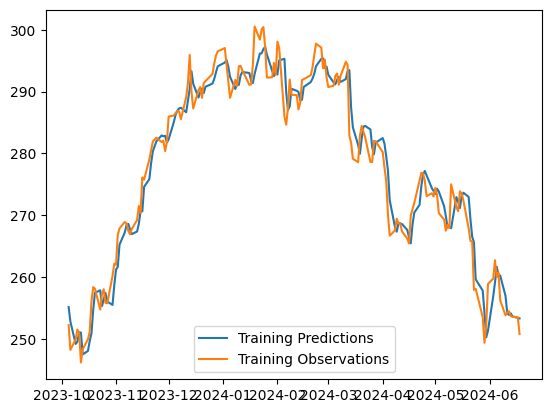

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


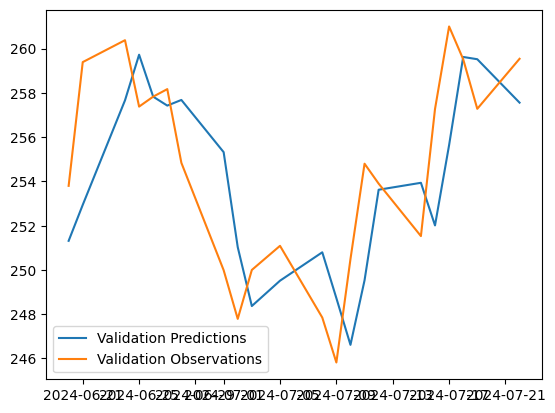

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


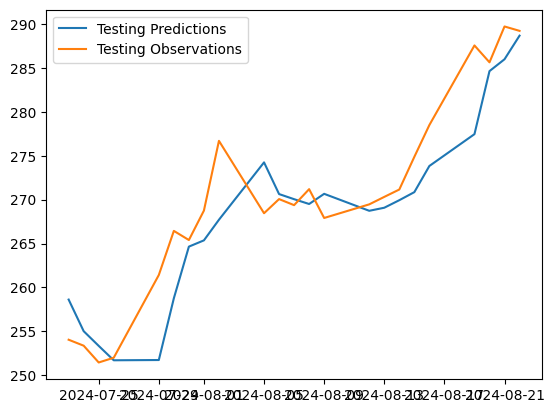

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
